<a href="https://colab.research.google.com/github/scsanjay/ml_from_scratch/blob/main/05.%20Logistic%20Regression/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import *
from sklearn.metrics import accuracy_score, confusion_matrix, fbeta_score
import seaborn as sns

## Custom implementation of Logistic Regression with L1 regularisation

In [3]:
class LogisticRegression():
  """
  SGD implementation of Logistic Regression with l1 regulariser.

  Parameters
  ----------
  alpha : float, default = 0.0001
    multiplier for the regularisation term
  
  eta0 : float, default = 0.0
    initial learning rate

  epoch : int, default = 1000

  Attributes
  ----------
  weights : array of size n_features

  bias : float
  """

  def __init__ (self, alpha=0.0001, eta0=0.0, epoch=1000):
    self.alpha = alpha
    self.eta0 = eta0
    self.epoch = epoch

  def _get_sigmoid(self, x):
    """ Calculate sigmoid function """
    if np.all(x>=0):
        return 1.0 / (1 + np.exp(-x))
    else:
        return np.exp(x)/(1+np.exp(x))

  def fit(self, X_train, y_train):
    """
    It will find a hyperplane that best separate the data.

    Parameters
    ----------
    X_train : array of shape (n_samples, n_features)

    Y_train : array of shape (n_samples)

    Returns
    -------
    self : object
    """

    # initialize weights and bias to 0s
    w = np.zeros(len(X_train[0]))
    b = 0

    n = len(y_train)

    # epoch iterations
    for j in range(self.epoch):
      
      # loop over all training data
      for i in range(n):
        x = X_train[i]
        y = y_train[i]

        # weight gradient
        dw = (self._get_sigmoid(np.dot(w,x)+b)-y)*x + (self.alpha/n)*((w+10**-5)/np.dot(w+10**-5, w+10**-5))

        # bias gradient
        db = self._get_sigmoid(np.dot(w,x)+b) - y

        # update weights and bias based on gradient and learning rate
        w = w-self.eta0*dw
        b = b-self.eta0*db
    
    # set weights and bias attributes
    self.weights = w
    self.bias = b
    return self

  def predict (self, X_test):
    """
    It will predict the output classes for the test data.

    Parameters
    ----------
    X_test : array of shape (n_samples, n_features)

    Returns
    -------
    predicted : array of shape (n_samples,)
    """
    # calculate predictions
    predictions = np.dot(self.weights, X_test.T)+self.bias

    # output 0 or 1
    predictions = np.array(predictions>=0, dtype=np.int16)
    return predictions


## Validating the implementation

In [4]:
# load and split the breast cancer data
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, train_size=.8)

In [5]:
# tune the model
model = LogisticRegression(alpha=0.0001, eta0=0.0001, epoch = 1100)
# fit the model
model.fit(X_train, y_train)
# predict the classes
y_pred = model.predict(X_test)

In [6]:
accuracy_score(y_test, y_pred)

0.9473684210526315

**Accuracy 94% which is good enough. But it's imbalanaced data, so we need to look at confusion matrix.**

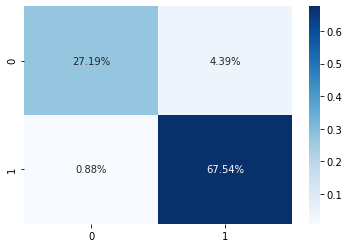

In [9]:
cf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

**Confusion matrix also looks good, both classes are well classified.**